In [40]:
import pandas as pd

# Load your dataset
df = pd.read_csv(url)

# Step 1: Identify numeric and categorical columns
numeric_features = df.select_dtypes(include=['number']).columns
categorical_features = df.select_dtypes(include=['object']).columns

# Step 2: Handle missing values for numeric columns
df[numeric_features] = df[numeric_features].fillna(df[numeric_features].mean())

# Step 3: Handle missing values for categorical columns
df[categorical_features] = df[categorical_features].fillna(df[categorical_features].mode().iloc[0])

# Check the result
print(df.isnull().sum())  # Check if there are any missing values left


car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


In [44]:
# Check column names to make sure they're correct
print(df.columns)

# Strip any extra spaces from column names (if any)
df.columns = df.columns.str.strip()

# Verify column names again
print(df.columns)


Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')
Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')


In [46]:
# Ensure 'price' is in the DataFrame
if 'price' in df.columns:
    print("'price' column exists.")
else:
    print("'price' column is missing!")


'price' column exists.


In [48]:
# Separate features (X) and target (y)
X = df.drop(columns=['price'], axis=1)  # Ensure that 'price' is excluded from features
y = df['price']  # Target (price column)

# Ensure that y is properly defined
print(y.head())


0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64


In [50]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the train and test sets
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


X_train shape: (164, 25), y_train shape: (164,)
X_test shape: (41, 25), y_test shape: (41,)


In [54]:
# Check column names to confirm 'price' exists
print(df.columns)


Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')


In [56]:
# Ensure the target variable 'price' exists
y = df['price']  # This should be correctly assigned


In [58]:
# Ensure 'price' is excluded from features
X = df.drop(columns=['price'])


In [60]:
# Check column names
print(df.columns)

# Define feature matrix X and target variable y
X = df.drop(columns=['price'])  # Exclude 'price' from features
y = df['price']  # Define 'price' as the target variable

# Proceed with the split
from sklearn.model_selection import train_test_split

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check shapes
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')
X_train shape: (164, 25), y_train shape: (164,)
X_test shape: (41, 25), y_test shape: (41,)


In [62]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Define feature matrix X and target variable y
X = df.drop(columns=['price'])  # Exclude 'price' from features
y = df['price']  # Define 'price' as the target variable

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define numeric and categorical columns
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Preprocessing pipeline for numeric and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),  # Standardize numeric columns
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)  # OneHotEncode categorical columns
    ])

# Create a pipeline with preprocessing and a regressor
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())  # You can replace this with another regressor, e.g., RandomForestRegressor
])

# Fit the model to the training data
model_pipeline.fit(X_train, y_train)

# Predict on the test data
y_pred = model_pipeline.predict(X_test)

# Evaluate the model using various metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


Mean Absolute Error: 7036.822281534846
Mean Squared Error: 178507386.671277
R² Score: -1.2611894438895352


In [66]:
param_grid = {
    'regressor__fit_intercept': [True, False]
}


In [68]:
grid_search = GridSearchCV(model_pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters and model from the grid search
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)


Best Parameters: {'regressor__fit_intercept': False}


In [70]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict on the test data
y_pred = best_model.predict(X_test)

# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)

# Print the metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)


Mean Absolute Error (MAE): 7124.617607293423
Mean Squared Error (MSE): 180280371.60497513
Root Mean Squared Error (RMSE): 13426.852632131446
R-squared (R2): -1.283648205350405


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [72]:
from sklearn.metrics import root_mean_squared_error

# Use the new recommended function for RMSE
rmse = root_mean_squared_error(y_test, y_pred)


In [74]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", root_mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


MAE: 7124.617607293423
MSE: 180280371.60497513
RMSE: 13426.852632131446
R² Score: -1.283648205350405


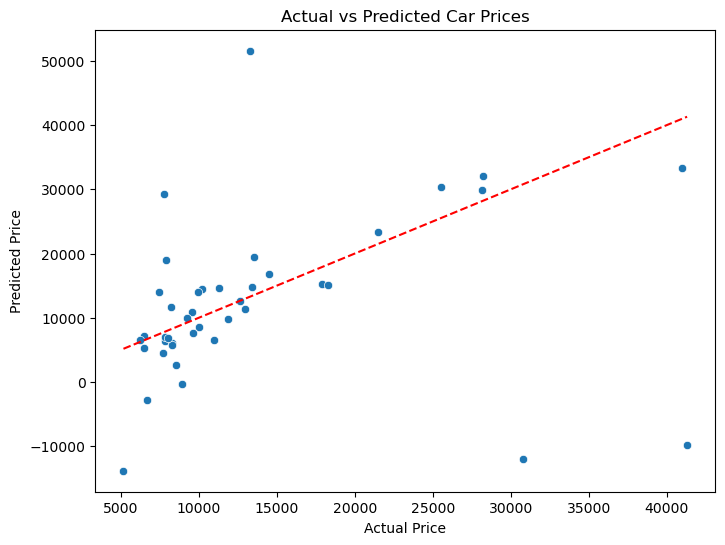

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


In [84]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, root_mean_squared_error

# Separate numeric and categorical columns
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

# Define transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Build pipeline
lin_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Fit the pipeline
lin_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_lin = lin_model.predict(X_test)
r2_lin = r2_score(y_test, y_pred_lin)
rmse_lin = root_mean_squared_error(y_test, y_pred_lin)

print("Linear Regression - R2:", r2_lin)
print("Linear Regression - RMSE:", rmse_lin)


Linear Regression - R2: -1.2611894438895352
Linear Regression - RMSE: 13360.665652252397


In [86]:
from sklearn.ensemble import RandomForestRegressor

# Build Random Forest pipeline
rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Fit the model
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = root_mean_squared_error(y_test, y_pred_rf)

print("Random Forest - R2:", r2_rf)
print("Random Forest - RMSE:", rmse_rf)


Random Forest - R2: 0.9535604245932532
Random Forest - RMSE: 1914.7132449932699


In [90]:
!pip install xgboost


   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
    --------------------------------------- 2.1/150.0 MB 5.9 MB/s eta 0:00:26
   - -------------------------------------- 4.5/150.0 MB 8.1 MB/s eta 0:00:18
   - -------------------------------------- 6.6/150.0 MB 9.1 MB/s eta 0:00:16
   -- ------------------------------------- 7.6/150.0 MB 8.5 MB/s eta 0:00:17
   -- ------------------------------------- 10.0/150.0 MB 8.4 MB/s eta 0:00:17
   --- ------------------------------------ 12.1/150.0 MB 8.5 MB/s eta 0:00:17
   --- ------------------------------------ 14.2/150.0 MB 8.6 MB/s eta 0:00:16
   ---- ----------------------------------- 16.5/150.0 MB 9.0 MB/s eta 0:00:15
   ----- ---------------------------------- 18.9/150.0 MB 9.1 MB/s eta 0:00:15
   ----- ---------------------------------- 21.2/150.0 MB 9.3 MB/s eta 0:00:14
 

In [91]:
conda install -c conda-forge xgboost


error: bad escape \P at position 28

In [93]:
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, root_mean_squared_error

# XGBoost pipeline
xgb_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(objective='reg:squarederror', random_state=42))
])

# Train the model
xgb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_xgb = xgb_model.predict(X_test)
r2_xgb = r2_score(y_test, y_pred_xgb)
rmse_xgb = root_mean_squared_error(y_test, y_pred_xgb)

print("XGBoost R²:", r2_xgb)
print("XGBoost RMSE:", rmse_xgb)


XGBoost R²: 0.9218525929213492
XGBoost RMSE: 2483.80162978208


In [95]:
import pandas as pd

# Collect the evaluation metrics
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost'],
    'R²': [r2_lin, r2_rf, r2_xgb],
    'RMSE': [rmse_lin, rmse_rf, rmse_xgb]
})

# Display the results
print(results)


               Model        R²          RMSE
0  Linear Regression -1.261189  13360.665652
1      Random Forest  0.953560   1914.713245
2            XGBoost  0.921853   2483.801630
